In [135]:
import pandas as pd
import numpy as np
import seaborn as sb
pd.set_option('display.max_rows', 200, 'display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import linear_model

In [136]:
numerical = pd.read_csv('..\\lab-random-forests\\files_for_lab\\numerical.csv')
categorical = pd.read_csv('..\\lab-random-forests\\files_for_lab\\categorical.csv')
targets = pd.read_csv('..\\lab-random-forests\\files_for_lab\\target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)

In [137]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [138]:
data_reg = data[data.TARGET_B == 1].reset_index(drop=True)

In [139]:
data_reg

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,87,1,36,1,88,1,94,4,96,3,87,1,1,4.0
1,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,90,1,0,2,90,4,93,1,95,12,90,4,1,7.0
2,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,

In [140]:
data_reg.isna().sum().sum()

0

In [141]:
data_reg = data_reg.drop('TARGET_B', axis = 1)
data_reg

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,87,1,36,1,88,1,94,4,96,3,87,1,4.0
1,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,90,1,0,2,90,4,93,1,95,12,90,4,7.0
2,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,

In [142]:
data_reg['TARGET_D'].sum()

75668.7

In [143]:
y = data_reg['TARGET_D']
X = data_reg.drop(['TARGET_D'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

# Hot Encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)

# MinMax Scaling
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numericalX)
numerical_scaled = pd.DataFrame(numerical_scaled, columns= numericalX.columns)

X = pd.concat([numerical_scaled, encoded_categorical], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=420)

In [144]:
%%time
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.17935504696669174, 'Linear Regression': 0.33098384396618036, 'KNN': 0.13558700419244002}
Wall time: 4.62 s


In [145]:
list(zip(model_pipeline, model_names))

[(DecisionTreeRegressor(), 'Decision Tree Regressor'),
 (LinearRegression(), 'Linear Regression'),
 (KNeighborsRegressor(), 'KNN')]

In [146]:
val_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    val_scores[model_name] = model.score(X_val,y_val)
print(val_scores)

{'Decision Tree Regressor': -0.0809944174866275, 'Linear Regression': 0.45013085145068255, 'KNN': 0.1847325751729294}


## As the Linear Regression is giving the best score, I will now look to improve that score

In [147]:
X_added_constant = sm.add_constant(X)
X_added_constant
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TARGET_D   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     16.61
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        01:23:02   Log-Likelihood:                -17054.
No. Observations:                4843   AIC:                         3.482e+04
Df Residuals:                    4488   BIC:                         3.712e+04
Df Model:                         354                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.2893      4.918      1.482      0.138      -2.352      16.931
TCODE           -1.0258      4.285     -0.239      0.811      -9.427       7.376
AGE              1.6345      1.122      1.457      0.145      -0.565       3.834
INCOME           0.6658      0.563      1.182      0.237      -0.439       1.770
WEALTH1          0.6697      0.575      1.164      0.244      -0.458       1.798
HIT             -4.9170      3.427     -1.435      0.151     -11.635       1.801
MALEMILI        -5.9606      4.721     -1.262      0.207     -15.217       3.295
MALEVET          1.3711      2.068      0.663      0.507      -2.684       5.426
VIETVETS        -0.3518      1.668     -0.211      0.833      -3.621       2.918
WWIIVETS        -2.8001      1.654     -1.693      0.091      -6.043       0.442
LOCALGOV         5.0414      2.826      1.784      0.075      -0.500      10.582
STATEGOV         1.4303      2.885      0.496      0.620      -4.225       7.085
FEDGOV           7.4412      4.777      1.558      0.119      -1.924      16.806
WEALTH2          0.4052      0.550      0.737      0.461      -0.673       1.483
POP901         -10.8974     13.771     -0.791      0.429     -37.895      16.100
POP902           3.8700     11.555      0.335      0.738     -18.784      26.524
POP903           4.0920     10.769      0.380      0.704     -17.021      25.205
POP90C1         48.4654     34.013      1.425      0.154     -18.216     115.147
POP90C2         48.3127     33.902      1.425      0.154     -18.152     114.778
POP90C3         48.5118     34.009      1.426      0.154     -18.162     115.186
POP90C4       -223.5153    438.068     -0.510      0.610   -1082.345     635.315
POP90C5       -181.6392    336.227     -0.540      0.589    -840.810     477.531
ETH1            66.8941     22.006      3.040      0.002      23.751     110.037
ETH2           -12.5239     27.174     -0.461      0.645     -65.799      40.751
ETH3             7.6016      6.441      1.180      0.238      -5.027      20.230
ETH4            14.1848     12.877      1.102      0.271     -11.061      39.431
ETH5           -60.8935     23.516     -2.589      0.010    -106.997     -14.790
ETH6            -2.9417      3.033     -0.970      0.332      -8.889       3.005
ETH7            -0.1691      9.345     -0.018      0.986     -18.490      18.152
ETH8            -5.9774     10.536     -0.567      0.571     -26.633      14.678
ETH9            -7.5329      6.214     -1.212      0.225     -19.715       4.649
ETH10           -5.3440      8.080     -0.661      0.508     -21.184      10.496
ETH11           -5.3572      4.708     -1.138      0.255     -14.588       3.873
ETH12           -2.1659      9.973     -0.217      0.828     -21.718      17.386
ETH13           60.6919     22.067      2.750      0.006      17.430     103.953
ETH14

### Recursive Feature Elimination

In [148]:
%%time
X = numerical_scaled
y = data_reg['TARGET_D'] # already defined above

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

Wall time: 13.4 s


RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=False)

In [149]:
display(numerical_scaled.shape)
display(numerical.shape)

(4843, 330)

(95412, 315)

In [150]:
%%time

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical_scaled).columns
df
df[df['Rank']<11]
df[df['Rank']==1]
# df['Rank'].value_counts()

Wall time: 2.99 ms


,Rank,Column_name
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
21,1,ETH1
25,1,ETH5
33,1,ETH13
36,1,ETH16
92,1,HHD1
95,1,HHD4
98,1,HHD7


In [151]:
r1 = df[df['Rank']==1].reset_index(drop=True)
r1_lst = list(r1.Column_name)
r1_lst

['POP90C1',
 'POP90C2',
 'POP90C3',
 'ETH1',
 'ETH5',
 'ETH13',
 'ETH16',
 'HHD1',
 'HHD4',
 'HHD7',
 'ETHC1',
 'ETHC2',
 'ETHC3',
 'MC1',
 'MC2',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'LASTGIFT',
 'AVGGIFT']

In [152]:
r1 = numerical_scaled[r1_lst]
r1

,POP90C1,POP90C2,POP90C3,ETH1,ETH5,ETH13,ETH16,HHD1,HHD4,HHD7,ETHC1,ETHC2,ETHC3,MC1,MC2,RAMNTALL,NGIFTALL,MINRAMNT,LASTGIFT,AVGGIFT
0,1.00000,0.000000,0.000000,0.979798,0.010204,0.010870,0.000000,0.424242,0.343434,0.137931,0.295775,0.585859,0.175258,0.616162,0.419355,0.021053,0.155556,0.004444,0.011111,0.004033
1,1.00000,0.000000,0.000000,0.949495,0.051020,0.032609,0.035088,0.636364,0.595960,0.068966,0.422535,0.606061,0.041237,0.747475,0.279570,0.024256,0.111111,0.004444,0.015556,0.008757
2,0.89899,0.000000,0.111111,1.000000,0.010204,0.000000,0.000000,0.272727,0.252525,0.034483,0.225352,0.626263,0.216495,0.616162,0.419355,0.039817,0.222222,0.006667,0.011111,0.005799
3,1.00000,0.000000,0.000000,0.979798,0.030612,0.021739,0.017544,0.181818,0.151515,0.068966,0.154930,0.636364,0.237113,0.555556,0.483871,0.053547,0.122222,0.011111,0.022222,0.019518
4,1.00000,0.000000,0.000000,0.070707,0.000000,0.000000,0.000000,0.555556,0.363636,0.327586,0.000000,0.030303,0.030928,0.393939,0.655914,0.036156,0.100000,0.011111,0.026667,0.015945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0.00000,1.000000,0.010101,0.949495,0.081633,0.065217,0.017544,0.282828,0.171717,0.189655,0.253521,0.454545,0.309278,0.606061,0.430108,0.102092,0.322222,0.000156,0.037778,0.012674
4839,1.00000,0.000000,0.000000,0.909091,0.091837,0.065217,0.035088,0.424242,0.353535,0.120690,0.309859,0.575758,0.113402,0.868687,0.150538,0.009153,0.022222,0.011111,0.033333,0.021007
4840,1.00000,0.000000,0.000000,0.858586,0.010204,0.010870,0.017544,0.292929,0.272727,0.051724,0.197183,0.575758,0.144330,0.323232,0.731183,0.059039,0.100000,0.011111,0.044444,0.027112
4841,0.00000,0.010101,1.000000,1.000000,0.000000,0.000000,0.000000,0.454545,0.404040,0.103448,0.394366,0.575758,0.154639,0.383838,0.666667,0.056751,0.122222,0.006667,0.044444,0.020821


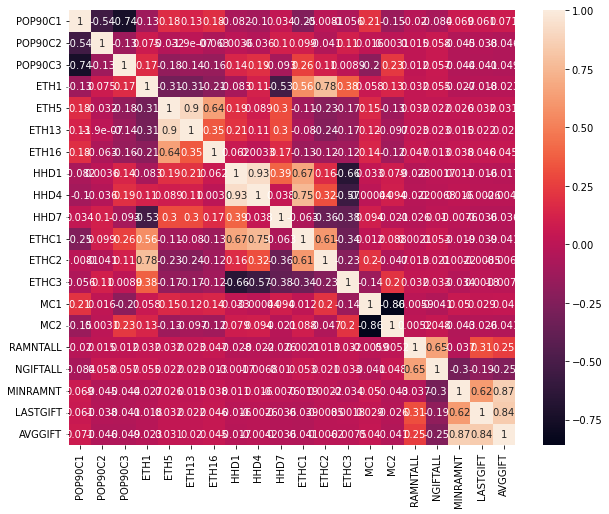

In [153]:
corr_matrix=r1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr_matrix, annot=True)
plt.show()

In [154]:
numerical_scaled = numerical_scaled.drop(['POP90C2', 'POP90C3', 'ETH5', 'ETH13', 'ETH16', 'HHD4', 'HHD7', 'ETHC2', 'MC2'], axis = 1)

In [155]:
%%time
X = numerical_scaled
y = data_reg['TARGET_D'] # already defined above

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical_scaled).columns
df
df[df['Rank']<11]
df[df['Rank']==1]
# df['Rank'].value_counts()

Wall time: 12.9 s


,Rank,Column_name
13,1,POP901
15,1,POP903
58,1,HHN2
59,1,HHN3
75,1,DW7
76,1,DW8
77,1,DW9
83,1,HU2
88,1,HHD2
96,1,HHD12


In [156]:
r1 = df[df['Rank']==1].reset_index(drop=True)
r1_lst = list(r1.Column_name)
r1_lst

['POP901',
 'POP903',
 'HHN2',
 'HHN3',
 'DW7',
 'DW8',
 'DW9',
 'HU2',
 'HHD2',
 'HHD12',
 'HUPA4',
 'HUPA5',
 'HUPA6',
 'HUPA7',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'AVGGIFT']

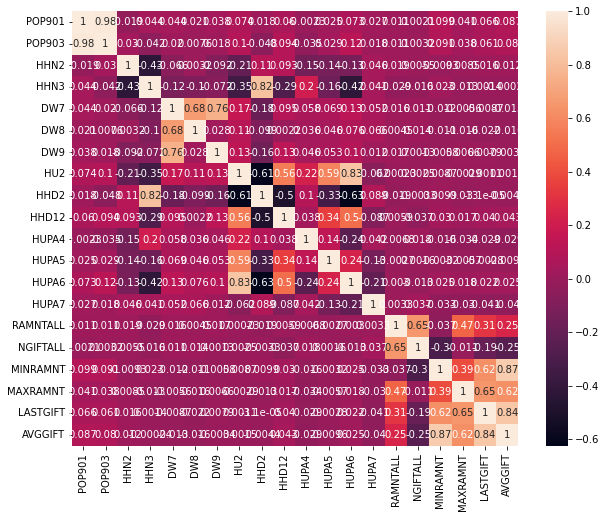

In [157]:
r1 = numerical_scaled[r1_lst]

corr_matrix=r1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr_matrix, annot=True)
plt.show()

In [158]:
numerical_scaled = numerical_scaled.drop(['POP903', 'HHN3', 'DW8', 'DW9', 'HU2', 'HHD2', 'HHD12', 'HUPA5', 'HUPA6', 'HUPA7'],
                                         axis = 1)

In [159]:
%%time
X = numerical_scaled
y = data_reg['TARGET_D'] # already defined above

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical_scaled).columns
df
df[df['Rank']<11]
df[df['Rank']==1]

Wall time: 12.3 s


,Rank,Column_name
16,1,POP90C4
17,1,POP90C5
61,1,MARR1
62,1,MARR2
63,1,MARR3
64,1,MARR4
79,1,HU3
80,1,HU4
84,1,HHD5
85,1,HHD6


In [160]:
r1 = df[df['Rank']==1].reset_index(drop=True)
r1_lst = list(r1.Column_name)
r1_lst

['POP90C4',
 'POP90C5',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HU3',
 'HU4',
 'HHD5',
 'HHD6',
 'IC5',
 'IC14',
 'IC23',
 'HC20',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'AVGGIFT']

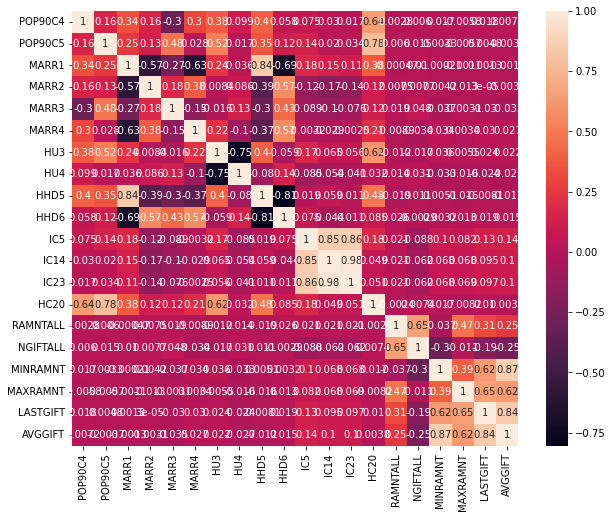

In [161]:
r1 = numerical_scaled[r1_lst]

corr_matrix=r1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr_matrix, annot=True)
plt.show()

In [162]:
numerical_scaled = numerical_scaled.drop(['POP90C5', 'MARR2', 'MARR3', 'MARR4', 'HU4', 'HHD6', 'IC14', 'IC23', 'IC14',
                                          'IC23'], axis = 1)

In [163]:
X = numerical_scaled
y = data_reg['TARGET_D'] # already defined above

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical_scaled).columns
df
r10 = df[df['Rank']<11]
# df[df['Rank']==1]
# df[df['Rank']<11].value_counts()
r10['Rank'].value_counts()


1     20
4      1
7      1
5      1
2      1
6      1
10     1
9      1
8      1
3      1
Name: Rank, dtype: int64

In [164]:
r1 = df[df['Rank']==1].reset_index(drop=True)
r1_lst = list(r1.Column_name)

X = numerical_scaled[r1_lst]
X

,POP901,POP902,HHAGE1,HHAGE3,HHN5,HHN6,DW1,IC5,AFC1,AFC3,HC15,HC17,HC18,HC20,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT
0,0.044224,0.044714,0.163265,0.154639,0.111111,0.020202,0.898990,0.116477,0.012346,0.000000,0.0,1.000000,0.010101,1.0,0.021053,0.155556,0.004444,0.002010,0.011111,0.004033
1,0.035075,0.039324,0.051020,0.030928,0.151515,0.060606,1.000000,0.112896,0.012346,0.000000,0.0,0.969697,0.040404,1.0,0.024256,0.111111,0.004444,0.005025,0.015556,0.008757
2,0.035288,0.045445,0.244898,0.226804,0.060606,0.010101,0.696970,0.149018,0.000000,0.000000,0.0,0.848485,0.161616,1.0,0.039817,0.222222,0.006667,0.001005,0.011111,0.005799
3,0.225466,0.248586,0.265306,0.247423,0.040404,0.010101,0.787879,0.291692,0.000000,0.000000,0.0,1.000000,0.000000,1.0,0.053547,0.122222,0.011111,0.012060,0.022222,0.019518
4,0.027332,0.027813,0.142857,0.103093,0.242424,0.131313,0.989899,0.071887,0.000000,0.000000,0.0,1.000000,0.000000,1.0,0.036156,0.100000,0.011111,0.007035,0.026667,0.015945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0.043277,0.044647,0.377551,0.360825,0.070707,0.030303,0.797980,0.069773,0.000000,0.000000,0.0,0.949495,0.040404,1.0,0.102092,0.322222,0.000156,0.012060,0.037778,0.012674
4839,0.136593,0.154634,0.173469,0.144330,0.090909,0.030303,0.707071,0.100233,0.012346,0.057143,0.0,1.000000,0.000000,1.0,0.009153,0.022222,0.011111,0.010050,0.033333,0.021007
4840,0.038686,0.043316,0.183673,0.164948,0.101010,0.040404,0.696970,0.116094,0.000000,0.000000,0.0,1.000000,0.000000,1.0,0.059039,0.100000,0.011111,0.020101,0.044444,0.027112
4841,0.027168,0.029942,0.234694,0.237113,0.151515,0.040404,0.818182,0.063929,0.000000,0.000000,0.0,0.515152,0.484848,1.0,0.056751,0.122222,0.006667,0.015075,0.044444,0.020821


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

LR = LinearRegression().fit(X_train,y_train)

score_20 = LR.score(X_test, y_test)

y_pred_20 = LR.predict(X_test)

display('R2 score with 20 features:',score_20)

'R2 score with 20 features:'

0.4886495447389745

In [166]:
# Looks like this could be the best score, but let me see if I removed too many high ranked features.

In [167]:
r1 = df[df['Rank']<11].reset_index(drop=True)
r1_lst = list(r1.Column_name)

X = numerical_scaled[r1_lst]
X.shape

(4843, 29)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

LR = LinearRegression().fit(X_train,y_train)

score_29 = LR.score(X_test, y_test)

y_pred_29 = LR.predict(X_test)

display('R2 score with 29 features:',score_29)

'R2 score with 29 features:'

0.4832632573159237

In [169]:
# A slight drop of R2 score

In [170]:
y = data_reg['TARGET_D']
X = data_reg.drop(['TARGET_D'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

# Hot Encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)

# MinMax Scaling
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numericalX)
numerical_scaled = pd.DataFrame(numerical_scaled, columns= numericalX.columns)

X = pd.concat([numerical_scaled, encoded_categorical], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

LR = LinearRegression().fit(X_train,y_train)

score_all = LR.score(X_test, y_test)

y_pred_all = LR.predict(X_test)

display('R2 score with all feautres:',score_all)

'R2 score with all feautres:'

0.45013085145068255

In [171]:
# Keeping all the columns gives a lower R2 score

In [172]:
display('R2 score with 20 features:',score_20)
display('R2 score with 29 features:',score_29)
display('R2 score with all feautres:',score_all)

'R2 score with 20 features:'

0.4886495447389745

'R2 score with 29 features:'

0.4832632573159237

'R2 score with all feautres:'

0.45013085145068255

In [173]:
display('y predict sum with 20 features:',y_pred_20.sum())
display('y predict sum with 29 features:',y_pred_29.sum())
display('y predict sum all feautres:',y_pred_all.sum())
display('y actual sum:',y.sum())

'y predict sum with 20 features:'

15426.645072217101

'y predict sum with 29 features:'

15449.026341448816

'y predict sum all feautres:'

15525.150832579006

'y actual sum:'

75668.7

## Although R2 score with 20 features is the best score, the predicted target total is slightly higher with 29 features, making it the closest to the actual sum of Target D. However, there is still more work to be done to get a better prediction model.